# Replication of Lab 4

# Group 6
Members:
1. Eljaer Eusebio
2. Claudia Vivas
3. Luis Sandoval
4. Andre Tapia

# Question 1 

In [1]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# 1. Simulation Design 1

## Simulationg desing in the case B=50

In [2]:
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [3]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
   
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]


In [4]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

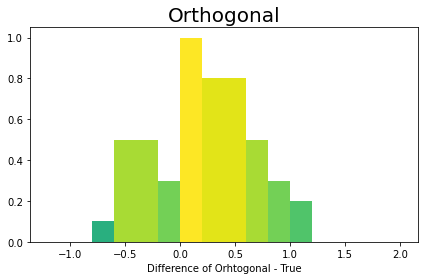

In [5]:
# Now we create a histogram
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

N, bins, patches = axs.hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Orthogonal', size=20)
plt.xlabel("Difference of Orhtogonal - True")

plt.show()

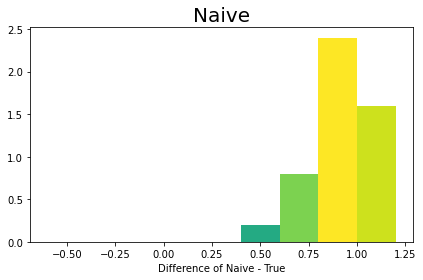

In [6]:
# Create histogram
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

N, bins, patches = axs.hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks)

fracs = ((N**(1 /5 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Naive', size=20)
plt.xlabel("Difference of Naive - True")

# Show plot
plt.show()

## 1.2 Simulation design B=100

In [7]:
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [8]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [9]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

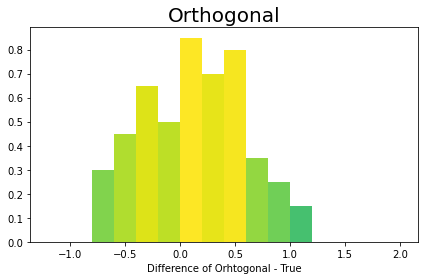

In [10]:
# Create histogram
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

N, bins, patches = axs.hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Orthogonal', size=20)
plt.xlabel("Difference of Orhtogonal - True")

plt.show()

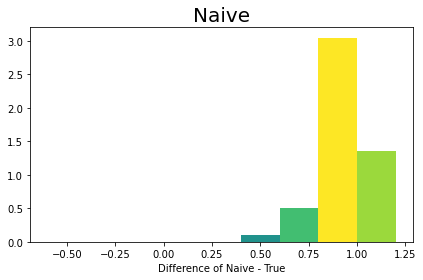

In [11]:
# Create histogram
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

N, bins, patches = axs.hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks)

fracs = ((N**(1 /5 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Naive', size=20)
plt.xlabel("Difference of Naive - True")

plt.show()

## 1.3 Simulation design B=1000

In [12]:
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [ ]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )
    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]



In [ ]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

In [ ]:
# Create histogram
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

N, bins, patches = axs.hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Orthogonal', size=20)
plt.xlabel("Difference of Orhtogonal - True")

plt.show()

In [ ]:
# Create
fig, axs = plt.subplots(1, 1, sharex= True, tight_layout=True)

# Create histogram
N, bins, patches = axs.hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks)

fracs = ((N**(11 /12 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.title('Naive', size=20)
plt.xlabel("Difference of Naive - True")

# Show plot
plt.show()

# CONCLUSIONS

#### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
In the orthogonal figure, the distribution is converging to 0 meanwhile in the naive figure we have that the graphic is skewed to the right. If we increase the number of trials, in the orthogonal case we have the data looks more like a normal distribution but in the naive the data tend more to the right. 

#### Why does this happen? Give an econometric explanation of this.
Neyman Orthogonality

$ D = \vartheta_n\alpha(\eta^0) = 0 $ , $\vartheta_nM(\alpha, \eta^0) = 0 $ 

Neyman's orthogonality holds that the estimated coefficient $(\ alpha)$ of the treatment depends on the coefficients estimated via partialing-out. That is, $\ alpha$ is insensitive to changes in the estimated coefficients via partialing-out.

Taking into account the concept of orthogonality, the estimation of the treatment coefficient using a double lasso via partialling-out model generates an estimated coefficient with a lower standard error, since this is more similar to the population coefficient. This is because in the second step of the partialling-out algorithm the treatment (D) is cleaned of all possible effects of D. In this sense, the coefficient estimated via partialling-out closely resembles the population parameter and complies with Neyman's orthogonality. However, the naive method generates a less precise estimated coefficient than the previous method, because although it uses laso and ols regression, it does not clean up the effects of X on D. This difference in the estimated coefficients can be observed in the histogram distributions for the following trials.

# Question 2

## Double-Lasso Approach
We have some problems running regressions with many candidate predictors. Finding a model that helps us make decisions about which variables will be interesting and which ones is not a delicate task. Therefore, the main objective is to find a suitable model.

One of them is related to DOUBLE-LASSO models, its method combines a regression model with a process of contractions of some parameters to zero and imposes a restriction or penalty on the regression coefficients, to select variables by two step, finding those that predict the dependent variable and those relative to independent variable. This is important, because exclusion of a covariate that is a modest predictor of the dependent variable but strong predictor of the independent variable can create a substantial omitted variable bias.Also, it helps to make test of randomization.

In the following lines, the explanation about Lasso's steps will be explained according to the article "Using double-loop regression for the selection of principle variables" by Urminsky, Hansen and Chernozhukov,

First, they estimate a linear regression model, because they want to find parameters that minimize the sum of squared errors in the regression equation:

$$
 Y_i= \beta_{0} + \beta_{1}X_i +  \beta_{2}W_i1+...+ \beta_{k+1}W_ik+e_{i}\
$$

A lasso regression find parameters which minimize the sum of squared errors in the regression equation with an additional penalty term:

$$
Min [\sum_{i}(Y_i - \beta_{0} + \beta_{1}X_i +  \beta_{2}W_i1+...+ \beta_{k+1}W_ik)^2 + \lambda \sum_{k}|\beta_{k}|
$$

The penalty term helps reduce the estimated regression coefficients to zero, and some are exactly zero, reducing the over-fitting. By setting some coefficients to zero, you also perform variable selection. Loop regression can be used when the number of observations is smaller than the number of predictors. However, we could omit important variables with nonzero coefficients and underestimate some nonzero coefficients. It would be a bias in the model. In this case, it is necessary to use the "double lasso" to select variables and alleviate both sources of bias.

Step 1:Fit a lasso regression predicting the dependent variable, and keeping track of the variables with non-zero estimated coefficients:

$$
Y_i= \alpha_{0} + \alpha_{1}W_i1 +...+ \alpha_{k}W_ik+e_{i}\
$$

Step 2: Fit a lasso regression predicting the focal independent variable, keeping track of the variables with non-zero estimated coefficients:

$$
X_i= \phi_{0} + \phi_{1}W_i1 +...+ \phi_{k}W_ik+e_{i}\
$$

If Xi is an effectively randomized treatment, no covariates should be selected in this step.

Step 3: Fit a linear regression of the dependent variable on the focal independent variable, including the covariates (Wik) selected in either of the first two steps

$$
Y_i= \alpha_{0} + \alpha_{1}W_i1 + \sum_{k \in A} \beta_{k+1}+...+ \alpha_{k}W_ik+e_{i}\
$$

In the equation, A is the union of the variables estimated to have non-zero coefficients in Steps 1 and 2. This regression could also include a small set of additional covariates identified a priori as necessary. Interpret and report the coefficient estimates and significance tests on the focal variable(s) as the final results. So, lambda is important to avoid over-fitting.

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [ ]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [ ]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("C:/Users/edfra/OneDrive/Documentos/GitHub/ECO224/Labs/data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

We determine the dimension of our data set.

In [ ]:
growth.shape

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', 1)

In [ ]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

## Summarize OLS results

In [ ]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In [ ]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

In [ ]:
W.shape

In [ ]:
Y.shape

In [ ]:
D.shape

## Double LASSO using cross Validation (Using Sklearn)

Now, we are going to use sample splitting approach:

In [ ]:
from sklearn.model_selection import train_test_split
D_train, D_test, Y_train, Y_test, W_train, W_test = train_test_split(D, Y, W, test_size = 0.30)
W_train.shape

In [ ]:
D_train.shape

In [ ]:
Y_train.shape

In [ ]:
#rom sklearn import model_selection
#from sklearn.model_selection import cross_val_score

#kfold = model_selection.KFold(n_splits=10)
#lr = LogisticRegression()
#scoring = 'accuracy'
#results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
#results

#### First of all, let's use the $ \alpha $ = 0.00077 because it is the value that get answers pretty similar in comparison with R

In [ ]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
# from sklearn import linear_model

# # Seat values for Lasso
# lasso_model = linear_model.Lasso( alpha = 0.00077 )
# r_Y = Y - lasso_model.fit( W, Y ).predict( W )
# r_Y = r_Y.rename('r_Y')

# # Part. out d
# r_D = D - lasso_model.fit( W, D ).predict( W )
# r_D = r_D.rename('r_D')

# # Regress residuales
# partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

# # output: estimated regression coefficient corresponding to the target regressor
# est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# # output: std. error
# std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# # output: 95% confidence interval
# lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
# upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [ ]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
scores = cross_val_score(mymodel, W_train, D_train ,Y_train)
scores

In [ ]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_test - lasso_model.fit(W_test,Y_test ).predict(W_test)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_test - lasso_model.fit(W_test,D_test).predict(W_test)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [ ]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

#### Secondly, let's use the $ \alpha $ = 0.1  in order to know how $\beta$ changes in comparison when we use $ \alpha $ = 0.00077

In [ ]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.1 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [ ]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
scores = cross_val_score(mymodel, W_train, D_train ,Y_train)
scores

In [ ]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.1 )
r_Y = Y_test - lasso_model.fit(W_test,Y_test ).predict(W_test)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_test - lasso_model.fit(W_test,D_test).predict(W_test)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [ ]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

#### Thridly, let's use the $ \alpha $ = 0.8 in order to know how $\beta$ changes in comparison when we use $ \alpha $ =0.00077 and the other $ \alpha $ = 0.1

In [ ]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.8 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [ ]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [ ]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

In [ ]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

## Summary LASSO results


Finally, let us have a look at the results.

In [ ]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso_train
table_2[0,1] = std_lasso_train
table_2[0,2] = lower_ci_lasso_train
table_2[0,3] = upper_ci_lasso_train


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO TRAIN (alpha=0.00077)" ]
table_2_pandas

In [ ]:
table_3 = table_1_pandas.append(table_2_pandas)
table_3

In [ ]:
table_4 = table_2 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_test
table_4[0,1] = std_lasso_test
table_4[0,2] = lower_ci_lasso_test
table_4[0,3] = upper_ci_lasso_test

table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_4_pandas.index = [ "LASSO TEST (alpha= 0.00077)" ]
table_4_pandas

In [ ]:
table_5 = table_3.append(table_4_pandas)
table_5

In [ ]:
table_6 = np.zeros( (1, 4) )

table_6[0,0] = est_lasso_train_1
table_6[0,1] = std_lasso_train_1
table_6[0,2] = lower_ci_lasso_train_1
table_6[0,3] = upper_ci_lasso_train_1


table_6_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_6_pandas.index = [ "LASSO TRAIN ( alpha =0.1)" ]
table_6_pandas

In [ ]:
table_7 = table_5.append(table_6_pandas)
table_7

In [ ]:
table_8 = table_2 = np.zeros( (1, 4) )

table_8[0,0] = est_lasso_test_1
table_8[0,1] = std_lasso_test_1
table_8[0,2] = lower_ci_lasso_test_1
table_8[0,3] = upper_ci_lasso_test_1

table_8_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_8_pandas.index = [ "LASSO TEST ( alpha= 0.1 )" ]
table_8_pandas

In [ ]:
table_9 = table_7.append(table_8_pandas)
table_9

In [ ]:
table_10 = np.zeros( (1, 4) )

table_10[0,0] = est_lasso_train_2
table_10[0,1] = std_lasso_train_2
table_10[0,2] = lower_ci_lasso_train_2
table_10[0,3] = upper_ci_lasso_train_2


table_10_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_10_pandas.index = [ "LASSO TRAIN (alpha=0.8)" ]
table_10_pandas

In [ ]:
table_11 = table_9.append(table_10_pandas)
table_11

In [ ]:
table_12 = np.zeros( (1, 4) )

table_12[0,0] = est_lasso_test_2
table_12[0,1] = std_lasso_test_2
table_12[0,2] = lower_ci_lasso_test_2
table_12[0,3] = upper_ci_lasso_test_2


table_12_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_12_pandas.index = [ "LASSO TEST (alpha=0.8)" ]
table_12_pandas

In [ ]:
table_13 = table_11.append(table_12_pandas)
table_13

In [ ]:
table_13_html = table_13.to_html()
print(table_13_html)

The least square method provides a rather noisy estimate of the speed of convergence. We can not answer the question if poor countries grow faster than rich countries. The least square method does not work when the ratio $p/n$ is large.

First of all, these are the $\beta$'s for Lasso when $\alpha$ = 0.00077.

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.14\%,1.03\%]$ only includes negative numbers. This empirical evidence does NOT support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

Secondly, these are the $\beta$'s for Lasso when $\alpha$ = 0.1.

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

First of all, these are the $\beta$'s for Lasso when $\alpha$ = 0.8

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO TRAIN (alpha=0.00077)</th>
      <td>-0.035543</td>
      <td>0.022953</td>
      <td>-0.081426</td>
      <td>0.010340</td>
    </tr>
    <tr>
      <th>LASSO TEST (alpha= 0.00077)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TRAIN ( alpha =0.1)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TEST ( alpha= 0.1 )</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TRAIN (alpha=0.8)</th>
      <td>-0.040951</td>
      <td>0.019292</td>
      <td>-0.080605</td>
      <td>-0.001296</td>
    </tr>
    <tr>
      <th>LASSO TEST (alpha=0.8)</th>
      <td>-0.040951</td>
      <td>0.019292</td>
      <td>-0.080605</td>
      <td>-0.001296</td>
    </tr>
  </tbody>
</table>

## Double LASSO using theoretical Lambda (HDM package)

In [ ]:
res_Y = hdmpy.rlasso( W, Y, post=True ).est['residuals']
res_D = hdmpy.rlasso( W, D, post=True ).est['residuals']

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [ ]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

In [ ]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_HDM = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_HDM = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_HDM = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_HDM = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [ ]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_lasso_HDM
table_3[0,1] = std_lasso_HDM
table_3[0,2] = lower_ci_lasso_HDM 
table_3[0,3] = upper_ci_lasso_HDM


table_3_pandas = pd.DataFrame( table_3, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3_pandas.index = [ "LASSO_HDM" ]
table_3_pandas

Using HDM package via lasso provides estimation with $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.73\%,-2.22\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

## Double LASSO using method = "partialling out"

In [ ]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")
lasso_direct

In [ ]:
est_lasso_part_out = lasso_direct["coefficients"]
std_lasso_part_out = lasso_direct["se"]
lower_ci_lasso_part_out = est_lasso - 1.96*std_lasso
upper_ci_lasso_part_out = est_lasso + 1.96*std_lasso

In [ ]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_part_out
table_4[0,1] = std_lasso_part_out
table_4[0,2] = lower_ci_lasso_part_out
table_4[0,3] = upper_ci_lasso_part_out


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_partialling_out" ]
table_4_pandas

The partialling-out approach via lasso does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

In [ ]:
table_14 = table_13.append(table_3_pandas)
table_14

In [ ]:
table_15 = table_14.append(table_4_pandas)
table_15

In [ ]:
coef_df = pd.DataFrame(table_15) 
coef_df

In [ ]:
variables = list(coef_df.index.values)
variables

In [ ]:
coef_df['variables'] = variables
coef_df

In [ ]:
errors = coef_df['Estimator'] - coef_df['lower bound CI']

In [ ]:
coef_df['errors'] = errors

In [ ]:
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15, 10))
    
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='Estimator', kind='bar',
            ax=ax, color='none', fontsize=22, 
            ecolor='steelblue',capsize=0,
            yerr='errors', legend=False)
    
# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)
    
# Coefficients
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
         marker='o', s=80, 
         y=coef_df['Estimator'], color='steelblue')
    
# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()

#### This graph shows the comparison of the coefficients in the different model approaches: OLS, Lasso (with $\alpha$ = 0.00077), Lasso (with $\alpha$ = 0.1), Lasso (with $\alpha$ = 0.8), Lasso with the HDM package and the Lasso by the "partialling out" method. These are the following inferences:


- First of all, Ordinal Least squares provides a rather noisy estimate (high standard error) of the speed of convergence, and does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

- Secondly, on the one hand, for  sample splitting via Lasso provides a more precise estimate. 

- The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.14\%,1.03\%]$ only includes negative numbers. This empirical evidence does NOT support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Thirdly, these are the $\beta$'s for Lasso when $\alpha$ = 0.1. On the one hand, for  sample splitting via Lasso provides a more precise estimate. 

- The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Fourthly, these are the $\beta$'s for Lasso when $\alpha$ = 0.8

- One the one hand, The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Fifthly, The Lasso via HDM package based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.73\%,-2.22\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Sixthly, The Lasso via partialling out method based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.05\%,-0.94\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

In conclusion, only lasso in almost all the methods used give us significant results (only not in the train sample with $\alpha$=0.00077). In other words, according to this empirical research we can say that poor countries grow faster than rich countries.